In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
customers = pd.read_csv('./dacon_data/open/customers.csv')
locations = pd.read_csv('./dacon_data/open/locations.csv')
orders = pd.read_csv('./dacon_data/open/orders.csv')
order_items = pd.read_csv('./dacon_data/open/order_items.csv')
payments = pd.read_csv('./dacon_data/open/payments.csv')
products = pd.read_csv('./dacon_data/open/products.csv')
reviews = pd.read_csv('./dacon_data/open/reviews.csv')
sellers = pd.read_csv('./dacon_data/open/sellers.csv')

NameError: name 'pd' is not defined

In [3]:
# locations

In [3]:
order_items.head(1)

NameError: name 'order_items' is not defined

In [4]:
# order_items.csv [파일]
# 주문 아이템과 관련된 정보
# Order_id : 주문 고유 ID
# Order_item_id : 동일한 주문에 포함된 품목 수를 식별하는 일련 번호
# Product_id : 제품 고유 ID
# Seller_id : 판매자 고유 ID
# Price : 판매 가격
# Freight_value : 품목 화물 가격


# products.csv [파일]
# 제품과 관련된 정보
# Product_id : 제품 고유 ID
# Product_category_name : 카테고리 이름






In [5]:
# reviews.shape #87873
# reviews.Order_id.unique().size #87349
# reviews.Order_id.value_counts()

In [6]:
# order_items.shape #100557
# order_items.Order_id.unique().size #87954
# order_items[order_items.Order_id=="ORDER_29361"]

In [7]:
# shape 모양 변화 일일일 확인해보기
#데이터 머지하고 필요없는 컬럼 삭제
temp = pd.merge(reviews,order_items, how='inner',on='Order_id')
temp = pd.merge(temp,orders, how='inner',on='Order_id')
temp = pd.merge(temp,payments, how='inner',on='Order_id')
temp = pd.merge(temp,products, how='inner',on='Product_id')
temp = pd.merge(temp,customers, how='inner',on='Customer_id')
temp = pd.merge(temp,sellers, how='inner',on='Seller_id')
# temp = temp.drop(["Review_creation_date","Review_answer_timestamp","Order_status","Payment_sequential","Payment_type","Payment_installments"],axis=1)
# temp = temp.drop(["Product_weight_g","Product_length_cm","Product_height_cm","Customer_zipcode_prefix","Seller_zipcode_prefix"],axis=1)
# temp = temp.drop(["Product_width_cm"],axis=1)

In [8]:
# 

In [9]:
test= temp.copy() #test용

In [10]:
test.shape

(104956, 32)

In [11]:
# test_city_max
# 비율이 적다고 무시하지말고 어디가 매출이 있는지를 계산해보자

In [12]:
test.head(1)

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Order_item_id,Product_id,Seller_id,Price,Freight_value,...,Product_length_cm,Product_height_cm,Product_width_cm,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state
0,REVIEW_00000,ORDER_01674,4,2019-01-18 00:00:00,2019-01-18 21:46:59,1,PRODUCT_21853,SELLER_0286,185.0,13.63,...,30.0,30.0,35.0,CUSTOMER_Unique_38397,6030,osasco,SP,14600,sao joaquim da barra,SP


In [13]:
test['Order_purchase_timestamp']=pd.to_datetime(test['Order_purchase_timestamp'])
test['YearMonth'] = test['Order_purchase_timestamp'].dt.strftime('%Y%m') #월별로 분류
test["earn"] = test['Price'] * test['Order_item_id'] #화물가치빼기
test[['Order_delivered_carrier_date','Order_delivered_customer_date']] = test[['Order_delivered_carrier_date','Order_delivered_customer_date']].apply(pd.to_datetime)  # format='%Y-%m-%d %H:%M:%S.%f'
test['time_gap'] = test['Order_delivered_customer_date'] - test['Order_delivered_carrier_date']
# test['real_gap'] = test['Order_delivered_customer_date'] - test['Order_estimated_delivery_date']

In [14]:
test.head(1)

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Order_item_id,Product_id,Seller_id,Price,Freight_value,...,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,YearMonth,earn,time_gap
0,REVIEW_00000,ORDER_01674,4,2019-01-18 00:00:00,2019-01-18 21:46:59,1,PRODUCT_21853,SELLER_0286,185.0,13.63,...,CUSTOMER_Unique_38397,6030,osasco,SP,14600,sao joaquim da barra,SP,201901,185.0,4 days 20:45:19


In [15]:
# test["Order_delivered_customer_date"]

In [16]:
test_city = test.groupby(["Customer_state"])["Customer_city"].count().reset_index()
test_city["ratio"]=test_city["Customer_city"].apply(lambda x : x/test.shape[0])

In [17]:
# test[test.Customer_state=="SP"]

In [18]:
test.head(1)

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Order_item_id,Product_id,Seller_id,Price,Freight_value,...,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,YearMonth,earn,time_gap
0,REVIEW_00000,ORDER_01674,4,2019-01-18 00:00:00,2019-01-18 21:46:59,1,PRODUCT_21853,SELLER_0286,185.0,13.63,...,CUSTOMER_Unique_38397,6030,osasco,SP,14600,sao joaquim da barra,SP,201901,185.0,4 days 20:45:19


In [19]:
test_city

,Customer_state,Customer_city,ratio
0,AC,82,0.000781
1,AL,407,0.003878
2,AM,146,0.001391
3,AP,74,0.000705
4,BA,3589,0.034195
5,CE,1392,0.013263
6,DF,2196,0.020923
7,ES,2108,0.020085
8,GO,2173,0.020704
9,MA,753,0.007174


In [20]:
test_city_time_diff=test.groupby(["Customer_state"])["time_gap"].sum().reset_index()

In [21]:
test_city_time_diff

,Customer_state,time_gap
0,AC,1477 days 08:48:18
1,AL,8661 days 10:51:53
2,AM,3579 days 13:11:26
3,AP,1833 days 18:13:13
4,BA,57976 days 13:28:38
5,CE,24896 days 23:34:05
6,DF,21950 days 06:55:03
7,ES,25981 days 14:39:35
8,GO,27289 days 11:03:30
9,MA,13587 days 12:47:35


In [22]:
test_city_payment_value = test.groupby(["Customer_state"])["Payment_value"].sum().reset_index()

In [23]:
# test_city_payment_value

In [24]:
test_city_review=test.groupby(["Customer_state"])["Review_score"].sum().reset_index()

In [25]:
# test_city_review

In [26]:
test_city_max = test.groupby(["Customer_state"])["earn"].sum().reset_index()

In [27]:
test_city_max = pd.merge(test_city_payment_value,test_city_max, how='inner',on='Customer_state')

In [28]:
test_city_max = pd.merge(test_city_time_diff,test_city_max, how='inner',on='Customer_state')

In [29]:
test_city_max = pd.merge(test_city_review,test_city_max, how='inner',on='Customer_state')

In [30]:
test_city_max

,Customer_state,Review_score,time_gap,Payment_value,earn
0,AC,330,1477 days 08:48:18,19283.82,15883.09
1,AL,1546,8661 days 10:51:53,100272.34,80659.71
2,AM,601,3579 days 13:11:26,30492.53,22433.81
3,AP,318,1833 days 18:13:13,19580.30,14072.74
4,BA,13792,57976 days 13:28:38,709906.51,543185.35
5,CE,5367,24896 days 23:34:05,304577.93,238680.78
6,DF,8889,21950 days 06:55:03,381425.56,306590.92
7,ES,8405,25981 days 14:39:35,351893.68,273695.62
8,GO,8725,27289 days 11:03:30,410104.57,317436.53
9,MA,2809,13587 days 12:47:35,183052.09,122800.51


In [31]:
test_city_max.head(1)

,Customer_state,Review_score,time_gap,Payment_value,earn
0,AC,330,1477 days 08:48:18,19283.82,15883.09


In [32]:
test_city.head(1)

,Customer_state,Customer_city,ratio
0,AC,82,0.000781


In [33]:
test_city_ratio_earn= pd.merge(test_city, test_city_max, on='Customer_state', how='inner')

In [34]:
test_city_ratio_earn["time_mean_gap"] = test_city_ratio_earn["time_gap"] / test_city_ratio_earn["Customer_city"]

In [35]:
test_city_ratio_earn["review_mean_gap"] = test_city_ratio_earn["Review_score"] / test_city_ratio_earn["Customer_city"]

In [36]:
test_city_ratio_earn

,Customer_state,Customer_city,ratio,Review_score,time_gap,Payment_value,earn,time_mean_gap,review_mean_gap
0,AC,82,0.000781,330,1477 days 08:48:18,19283.82,15883.09,18 days 00:24:00.219512195,4.024390
1,AL,407,0.003878,1546,8661 days 10:51:53,100272.34,80659.71,21 days 06:44:56.592137592,3.798526
2,AM,146,0.001391,601,3579 days 13:11:26,30492.53,22433.81,24 days 12:25:08.808219178,4.116438
3,AP,74,0.000705,318,1833 days 18:13:13,19580.30,14072.74,24 days 18:43:57.743243243,4.297297
4,BA,3589,0.034195,13792,57976 days 13:28:38,709906.51,543185.35,16 days 03:41:42.122596823,3.842853
5,CE,1392,0.013263,5367,24896 days 23:34:05,304577.93,238680.78,17 days 21:15:29.917385057,3.855603
6,DF,2196,0.020923,8889,21950 days 06:55:03,381425.56,306590.92,9 days 23:53:37.897540983,4.047814
7,ES,2108,0.020085,8405,25981 days 14:39:35,351893.68,273695.62,12 days 07:48:20.936907020,3.987192
8,GO,2173,0.020704,8725,27289 days 11:03:30,410104.57,317436.53,12 days 13:24:08.048780487,4.015186
9,MA,753,0.007174,2809,13587 days 12:47:35,183052.09,122800.51,18 days 01:04:07.616201859,3.730412


In [37]:
all_earn_sum = test_city_ratio_earn["earn"].sum()

In [38]:
all_earn_sum # 전체 벌어들인 돈

14215833.350000001

In [39]:
test_city_ratio_earn["earn_ratio"] = test_city_ratio_earn["earn"].apply(lambda x : x/all_earn_sum)

In [40]:
test_city_ratio_earn.head(1)

,Customer_state,Customer_city,ratio,Review_score,time_gap,Payment_value,earn,time_mean_gap,review_mean_gap,earn_ratio
0,AC,82,0.000781,330,1477 days 08:48:18,19283.82,15883.09,18 days 00:24:00.219512195,4.02439,0.001117


In [41]:
test_city_ratio_earn.Customer_state.size

27

In [42]:
test_city_ratio_earn["ratio_gap"] = test_city_ratio_earn["earn_ratio"] - test_city_ratio_earn["ratio"]

[Text(0, 0, 'AC'),
 Text(1, 0, 'AL'),
 Text(2, 0, 'AM'),
 Text(3, 0, 'AP'),
 Text(4, 0, 'BA'),
 Text(5, 0, 'CE'),
 Text(6, 0, 'DF'),
 Text(7, 0, 'ES'),
 Text(8, 0, 'GO'),
 Text(9, 0, 'MA'),
 Text(10, 0, 'MG'),
 Text(11, 0, 'MS'),
 Text(12, 0, 'MT'),
 Text(13, 0, 'PA'),
 Text(14, 0, 'PB'),
 Text(15, 0, 'PE'),
 Text(16, 0, 'PI'),
 Text(17, 0, 'PR'),
 Text(18, 0, 'RJ'),
 Text(19, 0, 'RN'),
 Text(20, 0, 'RO'),
 Text(21, 0, 'RR'),
 Text(22, 0, 'RS'),
 Text(23, 0, 'SC'),
 Text(24, 0, 'SE'),
 Text(25, 0, 'SP'),
 Text(26, 0, 'TO')]

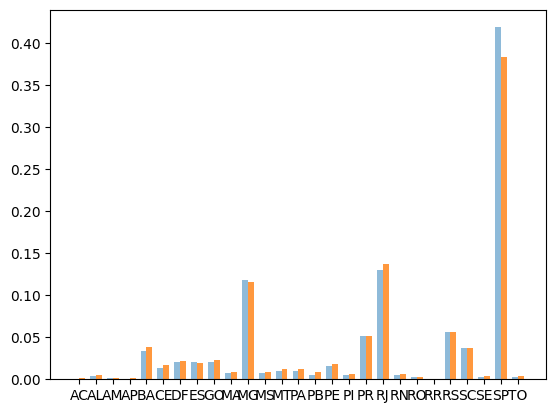

In [43]:
import matplotlib.pyplot as plt
x=np.arange(27)
width = 0.35
fig, axes = plt.subplots()
axes.bar(x - width/2, test_city_ratio_earn["ratio"], width, alpha = 0.5) #물품비율
axes.bar(x + width/2, test_city_ratio_earn["earn_ratio"], width, alpha = 0.8) #매출비율
plt.xticks(x)
axes.set_xticklabels(test_city_ratio_earn["Customer_state"])



/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jotaesik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(

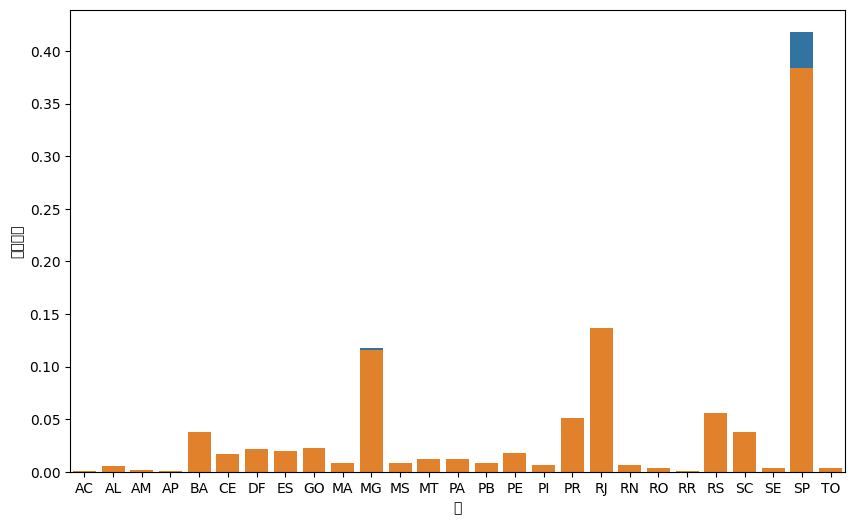

In [44]:
plt.figure(figsize=(10, 6))

# sns.barplot(x='Customer_state', y='earn_ratio', data=test_city_ratio_earn)
sns.barplot(x='Customer_state', y='ratio', data=test_city_ratio_earn)
sns.barplot(x='Customer_state', y='earn_ratio', data=test_city_ratio_earn)
plt.xlabel('주')
plt.ylabel('버는금액')
plt.show()

In [45]:
test_city_ratio_earn_top14 = test_city_ratio_earn.sort_values(["earn_ratio"],ascending=False)[:14]
#1퍼 이상은 14개로 간주

In [46]:
# test_city_ratio_earn_top14
# test_city_ratio_earn["real_value-earn"] = test_city_ratio_earn["earn"] - test_city_ratio_earn["Payment_value"]

In [47]:
test_city_ratio_earn.head(1)

,Customer_state,Customer_city,ratio,Review_score,time_gap,Payment_value,earn,time_mean_gap,review_mean_gap,earn_ratio,ratio_gap
0,AC,82,0.000781,330,1477 days 08:48:18,19283.82,15883.09,18 days 00:24:00.219512195,4.02439,0.001117,0.000336


In [48]:
test_city_ratio_earn = test_city_ratio_earn.drop(["Payment_value","Review_score","time_gap","earn"],axis=1)

In [49]:
test_city_ratio_earn["just_days"] = test_city_ratio_earn["time_mean_gap"].apply(lambda x : int(str(x).split("days")[0]))
#달에 따라 분류해서 추이를 알아봐도좋다

In [50]:
test_city_ratio_earn.head(1)

,Customer_state,Customer_city,ratio,time_mean_gap,review_mean_gap,earn_ratio,ratio_gap,just_days
0,AC,82,0.000781,18 days 00:24:00.219512195,4.02439,0.001117,0.000336,18


In [51]:
test_city_ratio_earn.corr(numeric_only=True, method='pearson')

,Customer_city,ratio,review_mean_gap,earn_ratio,ratio_gap,just_days
Customer_city,1.000000,1.000000,0.254157,0.998988,-0.876860,-0.653167
ratio,1.000000,1.000000,0.254157,0.998988,-0.876860,-0.653167
review_mean_gap,0.254157,0.254157,1.000000,0.241020,-0.360506,-0.235865
earn_ratio,0.998988,0.998988,0.241020,1.000000,-0.854346,-0.675071
ratio_gap,-0.876860,-0.876860,-0.360506,-0.854346,1.000000,0.331590
just_days,-0.653167,-0.653167,-0.235865,-0.675071,0.331590,1.000000


In [52]:
# test_city_ratio_earn.corr(numeric_only=True, method='pearson')

In [53]:
#일단 크게 품목에 따라서 혹은 주에 따라서 분류할수있다  #월별로 분류 총 3개의 kpi가 나온다
# Product_category_name : 카테고리 이름
# ratio_gap을 올리는 방향을 ㅗ해본느게 좋지않을/까
test_city_ratio_earn.sort_values(["ratio_gap"]) #양수일수록좋은거
# test_city_ratio_earn["ratio_gap"] = test_city_ratio_earn["ratio_gap"]*100

,Customer_state,Customer_city,ratio,time_mean_gap,review_mean_gap,earn_ratio,ratio_gap,just_days
25,SP,43918,0.418442,0 days 19:52:20.163971274,4.175964,0.383504,-0.034938,0
10,MG,12380,0.117954,-9 days +16:49:01.299458033,4.110016,0.115897,-0.002057,-9
7,ES,2108,0.020085,12 days 07:48:20.936907020,3.987192,0.019253,-0.000832,12
22,RS,5883,0.056052,12 days 06:03:25.777834438,4.061533,0.055908,-0.000145,12
21,RR,42,0.000400,24 days 15:52:45.142857142,3.785714,0.000461,0.000061,24
17,PR,5396,0.051412,8 days 21:43:52.494069681,4.126019,0.051519,0.000107,8
2,AM,146,0.001391,24 days 12:25:08.808219178,4.116438,0.001578,0.000187,24
3,AP,74,0.000705,24 days 18:43:57.743243243,4.297297,0.000990,0.000285,24
0,AC,82,0.000781,18 days 00:24:00.219512195,4.024390,0.001117,0.000336,18
20,RO,264,0.002515,17 days 03:57:35.560606060,4.056818,0.003068,0.000553,17


In [54]:
test_city_ratio_earn_minus = test_city_ratio_earn[test_city_ratio_earn.ratio_gap <0]

In [55]:
test_city_ratio_earn_minus

,Customer_state,Customer_city,ratio,time_mean_gap,review_mean_gap,earn_ratio,ratio_gap,just_days
7,ES,2108,0.020085,12 days 07:48:20.936907020,3.987192,0.019253,-0.000832,12
10,MG,12380,0.117954,-9 days +16:49:01.299458033,4.110016,0.115897,-0.002057,-9
22,RS,5883,0.056052,12 days 06:03:25.777834438,4.061533,0.055908,-0.000145,12
25,SP,43918,0.418442,0 days 19:52:20.163971274,4.175964,0.383504,-0.034938,0


In [56]:
test_city_ratio_earn_minus["temp"] = -(test_city_ratio_earn_minus["earn_ratio"] / test_city_ratio_earn_minus["ratio_gap"])

/tmp/ipykernel_23021/1975316530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_city_ratio_earn_minus["temp"] = -(test_city_ratio_earn_minus["earn_ratio"] / test_city_ratio_earn_minus["ratio_gap"])


In [70]:
test.shape[0]

104956

In [57]:
test_city_ratio_earn_minus

,Customer_state,Customer_city,ratio,time_mean_gap,review_mean_gap,earn_ratio,ratio_gap,just_days,temp
7,ES,2108,0.020085,12 days 07:48:20.936907020,3.987192,0.019253,-0.000832,12,23.147848
10,MG,12380,0.117954,-9 days +16:49:01.299458033,4.110016,0.115897,-0.002057,-9,56.333603
22,RS,5883,0.056052,12 days 06:03:25.777834438,4.061533,0.055908,-0.000145,12,386.891312
25,SP,43918,0.418442,0 days 19:52:20.163971274,4.175964,0.383504,-0.034938,0,10.976792


In [58]:
# temp의 값은 그 지역이 벌어들이는 매출비율 / RATIO GAP( 전체지역에서 차지하는 비율 - 벌어들이는 매출비율)

In [59]:
# type(test_city_ratio_earn_minus.iloc[1,"earn_ratio"])
# test_city_ratio_earn_minus["ratio_gap"].iloc[1] / test_city_ratio_earn_minus["earn_ratio"].iloc[1]
# for i in range(len(test_city_ratio_earn_minus)):
#     tmp = test_city_ratio_earn_minus["ratio_gap"].iloc[i] / test_city_ratio_earn_minus["earn_ratio"].iloc[i]
#     test_city_ratio_earn_minus.loc[i,"temp"] = tmp
# test_city_ratio_earn_minus
# test_city_ratio_earn_minus

In [60]:
# 마이너스인 국가들 이유찾아보기
# 그러므로 RS->MG->ES->SP를 올려야한다

In [61]:
# 원본파일은 test
# test.iloc[0]

In [62]:
es = test[test.Customer_state=="ES"]
sp = test[test.Customer_state=="SP"]
mg = test[test.Customer_state=="MG"]
rs = test[test.Customer_state=="RS"]

In [63]:
es_minus = es[es.earn<0] #손해를 보는게 111개 
sp_minus = sp[sp.earn<0] #794개
mg_minus = mg[mg.earn<0]#466개
rs_minus = rs[rs.earn<0] #272

In [64]:
# es_minus.iloc[0]

In [65]:
locations_group_lat=locations.groupby(["Geolocation_zipcode_prefix"])["Geolocation_lat"].mean().reset_index()
locations_group_lng=locations.groupby(["Geolocation_zipcode_prefix"])["Geolocation_lng"].mean().reset_index()
locations_group =  pd.merge(locations_group_lat, locations_group_lng, how = 'inner', on="Geolocation_zipcode_prefix")


In [66]:
# 데이터 모으는 데이터프레임!!!
all_data_df=pd.DataFrame()

In [67]:
es_minus = pd.merge(es_minus, locations_group, left_on = 'Customer_zipcode_prefix', right_on = 'Geolocation_zipcode_prefix', how = 'inner')
es_minus = es_minus.rename(columns={'Geolocation_lat':'Customer_lat',"Geolocation_lng" : "Customer_lng" })
es_minus = pd.merge(es_minus, locations_group, left_on = 'Seller_zipcode_prefix', right_on = 'Geolocation_zipcode_prefix', how = 'inner')
es_minus = es_minus.rename(columns={'Geolocation_lat':'Seller_lat',"Geolocation_lng" : "Seller_lng" })
es_minus.drop(["Geolocation_zipcode_prefix_x","Geolocation_zipcode_prefix_y","Customer_zipcode_prefix", "Seller_zipcode_prefix"], axis=1,inplace=True)
es_minus_group = es_minus.groupby(["Product_id"])["Price"].unique().reset_index()
es_minus_group["price_choose"] = es_minus_group["Price"].apply(lambda x : len(x))
es_minus_group_length_list = es_minus_group["price_choose"].unique()  #1과 2뿐이므로 

In [68]:
es_minus_product_id_list = es_minus_group[es_minus_group.price_choose>1]["Product_id"].tolist() #4가지의 이름에서만 조절
es_minus_product_id_list

[]

In [69]:
es_minus_product_id_list[0]

IndexError: list index out of range

In [ ]:
# es_minus.head(1)

In [ ]:
for i in range(len(es_minus_product_id_list)):
    # print(es_minus_product_id_list[i])
    temp_for = es_minus[es_minus.Product_id==es_minus_product_id_list[i]].sort_values(["Review_score"],ascending=False)
    # temp_for = temp_for[["Review_score","earn"]]
    temp_for["Review_score"]= temp_for["Review_score"].astype(float)
    # display(temp_for)
    all_data_df = pd.concat([all_data_df,temp_for] , ignore_index=True)
    # temp_for.corr(numeric_only=True, method='pearson')




In [ ]:
all_data_df

In [ ]:
sp_minus = pd.merge(sp_minus, locations_group, left_on = 'Customer_zipcode_prefix', right_on = 'Geolocation_zipcode_prefix', how = 'inner')
sp_minus = sp_minus.rename(columns={'Geolocation_lat':'Customer_lat',"Geolocation_lng" : "Customer_lng" })
sp_minus = pd.merge(sp_minus, locations_group, left_on = 'Seller_zipcode_prefix', right_on = 'Geolocation_zipcode_prefix', how = 'inner')
sp_minus = sp_minus.rename(columns={'Geolocation_lat':'Seller_lat',"Geolocation_lng" : "Seller_lng" })
sp_minus.drop(["Geolocation_zipcode_prefix_x","Geolocation_zipcode_prefix_y","Customer_zipcode_prefix", "Seller_zipcode_prefix"], axis=1,inplace=True)
sp_minus_group = sp_minus.groupby(["Product_id"])["Price"].unique().reset_index()
sp_minus_group["price_choose"] = sp_minus_group["Price"].apply(lambda x : len(x))
sp_minus_group_length_list = sp_minus_group["price_choose"].unique()  #1과 2뿐이므로 

In [ ]:
sp_minus_product_id_list = sp_minus_group[sp_minus_group.price_choose>1]["Product_id"].tolist() #4가지의 이름에서만 조절
sp_minus_product_id_list

In [ ]:
for i in range(len(sp_minus_product_id_list)):
    # print(es_minus_product_id_list[i])
    temp_for = sp_minus[sp_minus.Product_id==sp_minus_product_id_list[i]].sort_values(["Review_score"],ascending=False)
    # temp_for = temp_for[["Review_score","earn"]]
    temp_for["Review_score"]= temp_for["Review_score"].astype(float)
    # display(temp_for)
    all_data_df = pd.concat([all_data_df,temp_for] , ignore_index=True)
    # temp_for.corr(numeric_only=True, method='pearson')




In [ ]:
mg_minus = pd.merge(mg_minus, locations_group, left_on = 'Customer_zipcode_prefix', right_on = 'Geolocation_zipcode_prefix', how = 'inner')
mg_minus = mg_minus.rename(columns={'Geolocation_lat':'Customer_lat',"Geolocation_lng" : "Customer_lng" })
mg_minus = pd.merge(mg_minus, locations_group, left_on = 'Seller_zipcode_prefix', right_on = 'Geolocation_zipcode_prefix', how = 'inner')
mg_minus = mg_minus.rename(columns={'Geolocation_lat':'Seller_lat',"Geolocation_lng" : "Seller_lng" })
mg_minus.drop(["Geolocation_zipcode_prefix_x","Geolocation_zipcode_prefix_y","Customer_zipcode_prefix", "Seller_zipcode_prefix"], axis=1,inplace=True)
mg_minus_group = mg_minus.groupby(["Product_id"])["Price"].unique().reset_index()
mg_minus_group["price_choose"] = mg_minus_group["Price"].apply(lambda x : len(x))
mg_minus_group_length_list = mg_minus_group["price_choose"].unique()  #1과 2뿐이므로 

In [ ]:
mg_minus_group_length_list

In [ ]:
mg_minus_product_id_list = mg_minus_group[mg_minus_group.price_choose>1]["Product_id"].tolist() #4가지의 이름에서만 조절
mg_minus_product_id_list

In [ ]:
for i in range(len(mg_minus_product_id_list)):
    # print(es_minus_product_id_list[i])
    temp_for = mg_minus[mg_minus.Product_id==mg_minus_product_id_list[i]].sort_values(["Review_score"],ascending=False)
    # temp_for = temp_for[["Review_score","earn"]]
    temp_for["Review_score"]= temp_for["Review_score"].astype(float)
    # display(temp_for)
    all_data_df = pd.concat([all_data_df,temp_for] , ignore_index=True)
    # temp_for.corr(numeric_only=True, method='pearson')




In [ ]:
rs_minus = pd.merge(rs_minus, locations_group, left_on = 'Customer_zipcode_prefix', right_on = 'Geolocation_zipcode_prefix', how = 'inner')
rs_minus = rs_minus.rename(columns={'Geolocation_lat':'Customer_lat',"Geolocation_lng" : "Customer_lng" })
rs_minus = pd.merge(rs_minus, locations_group, left_on = 'Seller_zipcode_prefix', right_on = 'Geolocation_zipcode_prefix', how = 'inner')
rs_minus = rs_minus.rename(columns={'Geolocation_lat':'Seller_lat',"Geolocation_lng" : "Seller_lng" })
rs_minus.drop(["Geolocation_zipcode_prefix_x","Geolocation_zipcode_prefix_y","Customer_zipcode_prefix", "Seller_zipcode_prefix"], axis=1,inplace=True)
rs_minus_group = rs_minus.groupby(["Product_id"])["Price"].unique().reset_index()
rs_minus_group["price_choose"] = rs_minus_group["Price"].apply(lambda x : len(x))
rs_minus_group_length_list = rs_minus_group["price_choose"].unique()  #1과 2뿐이므로 

In [ ]:
rs_minus_product_id_list = rs_minus_group[rs_minus_group.price_choose>1]["Product_id"].tolist() #4가지의 이름에서만 조절
rs_minus_product_id_list

In [ ]:
for i in range(len(rs_minus_product_id_list)):
    # print(es_minus_product_id_list[i])
    temp_for = rs_minus[rs_minus.Product_id==rs_minus_product_id_list[i]].sort_values(["Review_score"],ascending=False)
    # temp_for = temp_for[["Review_score","earn"]]
    temp_for["Review_score"]= temp_for["Review_score"].astype(float)
    # display(temp_for)
    all_data_df = pd.concat([all_data_df,temp_for] , ignore_index=True)
    # temp_for.corr(numeric_only=True, method='pearson')


In [ ]:
# all_data_df #가격이 2개이상인 품목들 존재하는 df

In [ ]:
# all_data_df.iloc[0] #Review_score earn
all_data_df_corr = all_data_df[["Review_score","earn"]]

In [ ]:
all_data_df_corr.corr(numeric_only=True, method='pearson')

In [ ]:
all_data_df.drop(["Review_id","Order_id","Review_creation_date","Review_answer_timestamp","Order_item_id"],axis=1,inplace=True)

In [ ]:
all_data_df.drop(["Seller_id","Customer_id","Order_status","Order_purchase_timestamp","Order_delivered_carrier_date"],axis=1,inplace=True)

In [ ]:
all_data_df.drop(["Order_delivered_customer_date","Order_estimated_delivery_date","Payment_sequential","Payment_type","Payment_installments"],axis=1,inplace=True)

In [ ]:
all_data_df.drop(["Product_weight_g","Product_length_cm","Product_width_cm","Customer_unique_id","Customer_city"],axis=1,inplace=True)

In [ ]:
all_data_df.drop(["YearMonth","Seller_state","Seller_city","Customer_state","Product_height_cm"],axis=1,inplace=True)

In [ ]:
all_data_df.iloc[0]

In [ ]:
product_id_list = all_data_df.Product_id.unique().tolist() #음수값을 뛰는 애들을 이유를 찾아보자
#test에서 가장 큰값을 비교하는것을 가져와보자

In [ ]:
# all_data_df[all_data_df.Product_id=="PRODUCT_03117"]

In [ ]:
test.iloc[0]

In [ ]:
# test[(test.Product_id=="PRODUCT_10137") & (test.earn==1)]

In [ ]:
only_one_df = pd.DataFrame()
for i in range(len(product_id_list)):
    temp_max = test[test.Product_id==product_id_list[i]]["earn"].max()
    temp_temp = test[(test.Product_id==product_id_list[i]) & (test.earn==temp_max)].reset_index()
    # print(a.shape[0])
    if temp_temp.shape[0]==1:
        # print(temp_temp.shape[0])
        only_one_df = pd.concat([only_one_df , temp_temp] , ignore_index=True)      #성공        
        pass
    else:
        # print(temp_temp.loc[0])
        temp_temp_1 = temp_temp.loc[0].to_frame().T
        # display(temp_temp_1)
        only_one_df = pd.concat([only_one_df , temp_temp_1] , ignore_index=True)          
        # display(temp_temp.iloc[0])
        # pass
# test[test.Product_id=="PRODUCT_04479"]["earn"].max()

In [ ]:
# only_one_df #가장 최상의 순이익을 뽑아준다 같은 물건에 있어서.

In [ ]:
all_data_df.earn.sum() #-770이다

In [ ]:
# only_one_df

In [ ]:
all_data_df = pd.merge(all_data_df, only_one_df, left_on = 'Product_id', right_on = 'Product_id', how = 'inner')

In [ ]:
all_data_df.earn_y.sum()              #earn_y 더해보자

In [ ]:
all_data_df.earn_y.sum() - all_data_df.earn_x.sum() #이득은 2519원이다

In [ ]:
es_minus = pd.merge(es_minus, locations_group, left_on = 'Customer_zipcode_prefix', right_on = 'Geolocation_zipcode_prefix', how = 'inner')
es_minus = es_minus.rename(columns={'Geolocation_lat':'Customer_lat',"Geolocation_lng" : "Customer_lng" })
es_minus = pd.merge(es_minus, locations_group, left_on = 'Seller_zipcode_prefix', right_on = 'Geolocation_zipcode_prefix', how = 'inner')
es_minus = es_minus.rename(columns={'Geolocation_lat':'Seller_lat',"Geolocation_lng" : "Seller_lng" })
es_minus.drop(["Geolocation_zipcode_prefix_x","Geolocation_zipcode_prefix_y","Customer_zipcode_prefix", "Seller_zipcode_prefix"], axis=1,inplace=True)
es_minus_group = es_minus.groupby(["Product_id"])["Price"].unique().reset_index()
es_minus_group["price_choose"] = es_minus_group["Price"].apply(lambda x : len(x))
es_minus_group_length_list = es_minus_group["price_choose"].unique()  #1과 2뿐이므로 
# 그런건좋아요, 월볍로 제한
es_minus_product_id_list = es_minus_group[es_minus_group.price_choose>1]["Product_id"] #4가지의 이름에서만 조절
es_minus_product_id_list
es_minus_1 = es_minus[es_minus.Product_id=="PRODUCT_28424"].sort_values(["Review_score"],ascending=False)
es_minus_1 = es_minus_1[["Review_score","earn","Price"]]
es_minus_1["Review_score"]= es_minus_1["Review_score"].astype(float)
es_minus_1.corr(numeric_only=True, method='pearson')

In [ ]:
# sp_minus_group_length_list = sp_minus_group["price_choose"].unique()  #1과 2뿐이므로 
# # 그런건좋아요, 월볍로 제한
# sp_minus_product_id_list = sp_minus_group[sp_minus_group.price_choose>1]["Product_id"] #4가지의 이름에서만 조절
# sp_minus_product_id_list
# # sp_minus_group_length_list

In [ ]:
# sp_minus_1 = sp_minus[sp_minus.Product_id=="PRODUCT_04479"].sort_values(["Review_score"],ascending=False)
# sp_minus_1 = sp_minus_1[["Review_score","earn"]]
# sp_minus_1

In [ ]:
# sp_minus_1["Review_score"]=sp_minus_1["Review_score"].astype(float)
# sp_minus_1.corr(numeric_only=True, method='pearson')

In [ ]:
# 가격이 여러개인거 다 모아보기
# es_minus = es[es.earn<0] #손해를 보는게 111개 
# sp_minus = sp[sp.earn<0] #794개
# mg_minus = mg[mg.earn<0]#466개
# rs_minus = rs[rs.earn<0] #272



In [ ]:
# # es_minus에 의한 전체
# es_minus_temp = es_minus[["Review_score","earn"]]
# es_minus_temp.corr(numeric_only=True, method='pearson') #상관이 없을리가 없다 분명 위에선 높은 값을 쫓았기에

In [ ]:
# 넓게 바라봐서 음수인 df에서는 손실을 최소화할수는 있으나 최소화 하는 쪽으로 하는게 맞나?

In [ ]:
# earn 을 구하는 공식이 test["earn"] = (test['Price']-test["Freight_value"]) * test['Order_item_id'] #화물가치빼기
# 여기서 바꿀수있는값이 freight_Value를 줄이는법분

In [ ]:
# # 가격 종류 예시 나중에 확대해도 좋을듯?
# test_price_group = test.groupby(["Product_id"])["Price"].unique().reset_index()
# test_price_group.head(1)
# test_price_group["price_choose"] = test_price_group["Price"].apply(lambda x : len(x))
# test_price_length_list = test_price_group["price_choose"].unique() #가격을 올리거나 운임요금을 적게 받거나
# # 가격 종류값 저장 리스트
# test_price_length_list = sorted(test_price_length_list)
# # test_price_length_list 2부터 의미가있다